In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('BYD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Jan 10, 2025",269.00,270.39,264.78,266.02,266.02,"8,054,821"
1,"Jan 9, 2025",269.00,271.70,266.66,269.39,269.39,"6,561,288"
2,"Jan 8, 2025",272.99,273.99,265.81,269.18,269.18,"10,908,247"
3,"Jan 7, 2025",271.28,277.73,267.50,274.03,274.03,"9,572,218"
4,"Jan 6, 2025",271.94,273.89,269.03,271.28,271.28,"8,244,683"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3287 non-null   object 
 1   Open       3287 non-null   float64
 2   High       3287 non-null   float64
 3   Low        3287 non-null   float64
 4   Close      3287 non-null   float64
 5   Adj Close  3287 non-null   float64
 6   Volume     3287 non-null   object 
dtypes: float64(5), object(2)
memory usage: 179.9+ KB


In [ ]:
df.shape

(3287, 7)

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2025-01-10,269.00,270.39,264.78,266.02,266.02,"8,054,821"
1,2025-01-09,269.00,271.70,266.66,269.39,269.39,"6,561,288"
2,2025-01-08,272.99,273.99,265.81,269.18,269.18,"10,908,247"
3,2025-01-07,271.28,277.73,267.50,274.03,274.03,"9,572,218"
4,2025-01-06,271.94,273.89,269.03,271.28,271.28,"8,244,683"


In [ ]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df['DayofWeek']=df['Date'].dt.day_of_week

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,DayofWeek
0,2025-01-10,269.00,270.39,264.78,266.02,266.02,"8,054,821",10,1,2025,4
1,2025-01-09,269.00,271.70,266.66,269.39,269.39,"6,561,288",9,1,2025,3
2,2025-01-08,272.99,273.99,265.81,269.18,269.18,"10,908,247",8,1,2025,2
3,2025-01-07,271.28,277.73,267.50,274.03,274.03,"9,572,218",7,1,2025,1
4,2025-01-06,271.94,273.89,269.03,271.28,271.28,"8,244,683",6,1,2025,0


In [ ]:
df.drop('Date',inplace=True,axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,DayofWeek
0,269.00,270.39,264.78,266.02,266.02,"8,054,821",10,1,2025,4
1,269.00,271.70,266.66,269.39,269.39,"6,561,288",9,1,2025,3
2,272.99,273.99,265.81,269.18,269.18,"10,908,247",8,1,2025,2
3,271.28,277.73,267.50,274.03,274.03,"9,572,218",7,1,2025,1
4,271.94,273.89,269.03,271.28,271.28,"8,244,683",6,1,2025,0


In [ ]:
df['Volume']=df['Volume'].str.replace(',','')

In [ ]:
df['Volume'].unique()

array(['8054821', '6561288', '10908247', ..., '38108083', '21964591',
       '56292536'], dtype=object)

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Day,0
Month,0
Year,0
DayofWeek,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Volume']=df['Volume'].str.replace('-','0')

In [ ]:
df['Volume']=df['Volume'].astype('float')

In [ ]:
df['Volume']=df['Volume'].replace(0,np.nan)

In [ ]:
df['Volume'].isnull().sum()

np.int64(15)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Volume'].isnull().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Day,0
Month,0
Year,0
DayofWeek,0


In [ ]:
df['Volume']=df['Volume']/1000000

In [ ]:
df['Volume']=df['Volume'].round(2)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Day,Month,Year,DayofWeek
0,269.00,270.39,264.78,266.02,266.02,8.05,10,1,2025,4
1,269.00,271.70,266.66,269.39,269.39,6.56,9,1,2025,3
2,272.99,273.99,265.81,269.18,269.18,10.91,8,1,2025,2
3,271.28,277.73,267.50,274.03,274.03,9.57,7,1,2025,1
4,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0


In [ ]:
df=df.rename(columns={'Volume':'Volume(Million)'})

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume(Million),Day,Month,Year,DayofWeek
0,269.00,270.39,264.78,266.02,266.02,8.05,10,1,2025,4
1,269.00,271.70,266.66,269.39,269.39,6.56,9,1,2025,3
2,272.99,273.99,265.81,269.18,269.18,10.91,8,1,2025,2
3,271.28,277.73,267.50,274.03,274.03,9.57,7,1,2025,1
4,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0


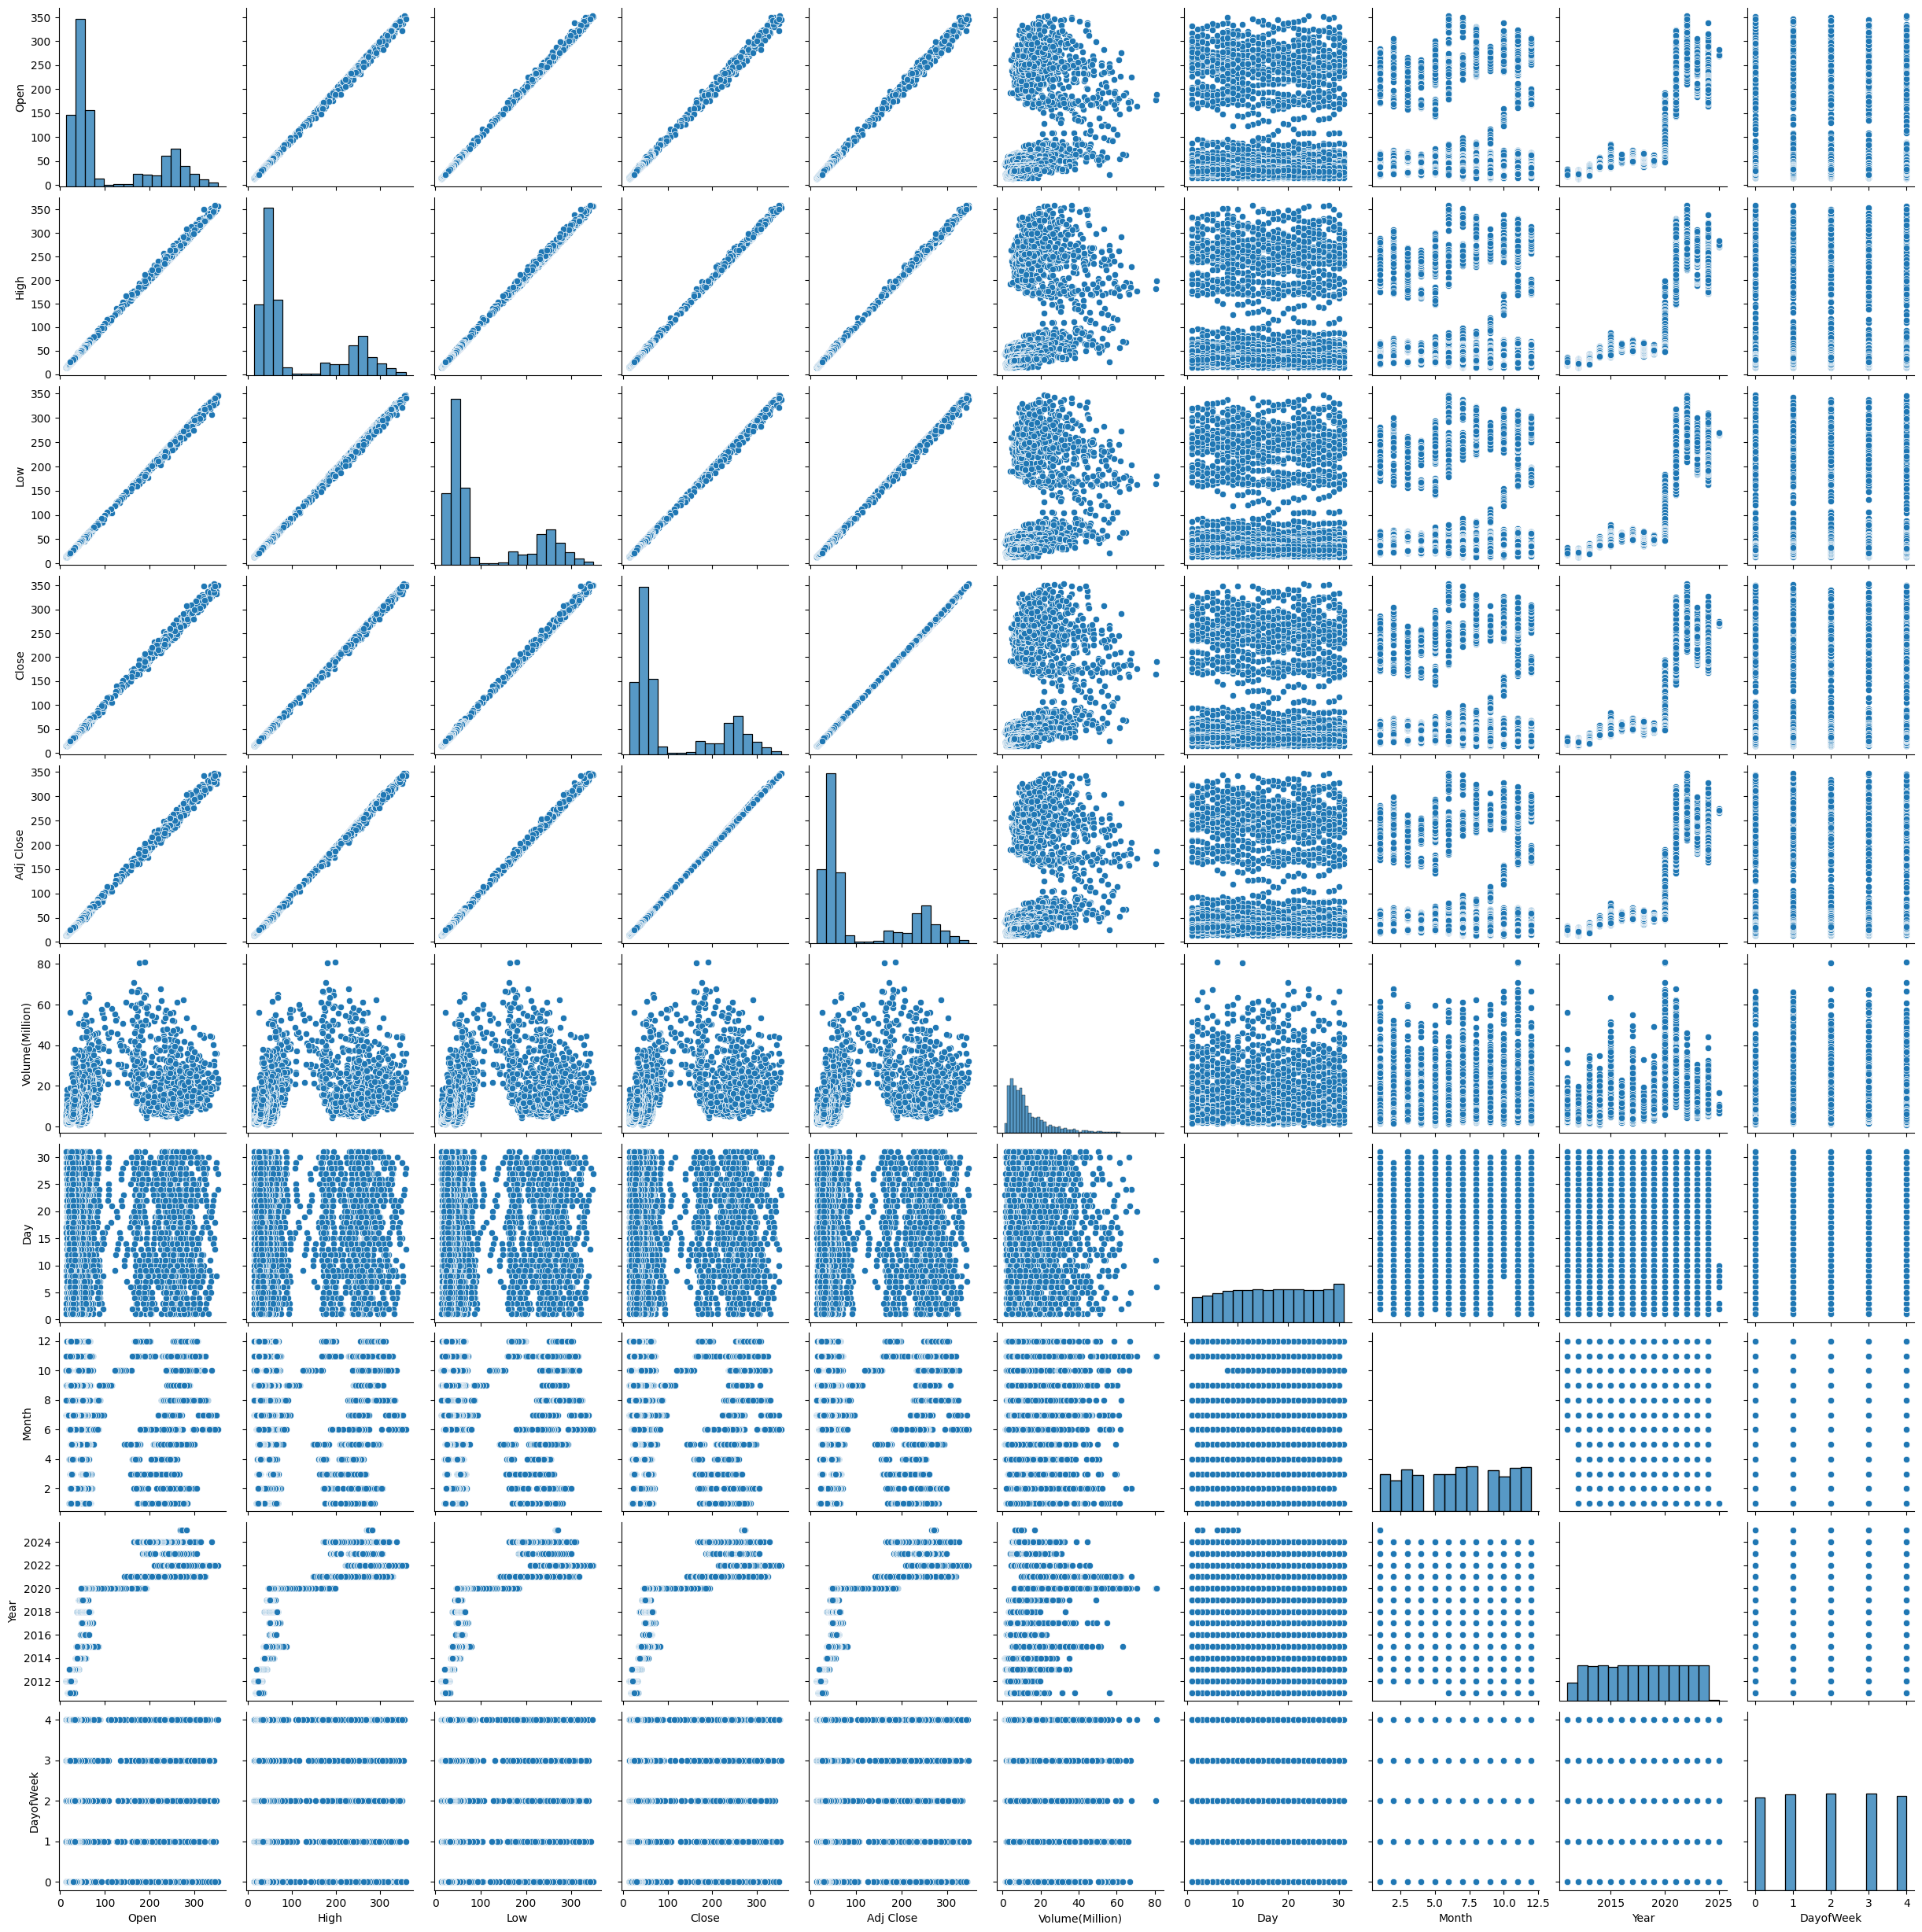

In [ ]:
sns.pairplot(df)

<Axes: xlabel='Year', ylabel='Close'>

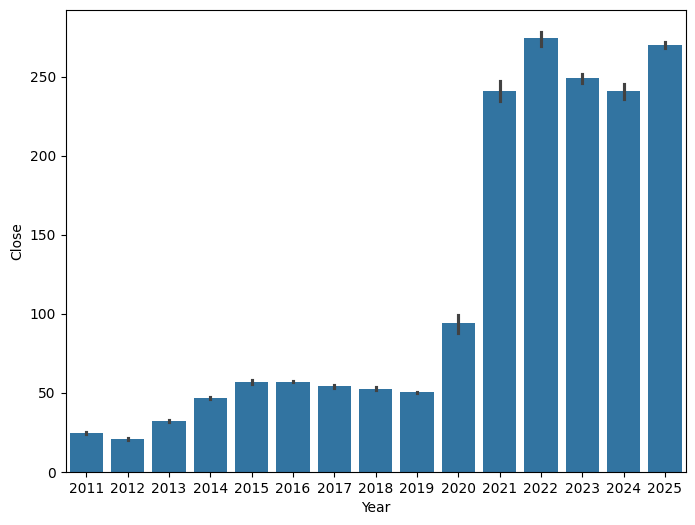

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Year',y='Close',data=df)

<Axes: xlabel='Year', ylabel='Open'>

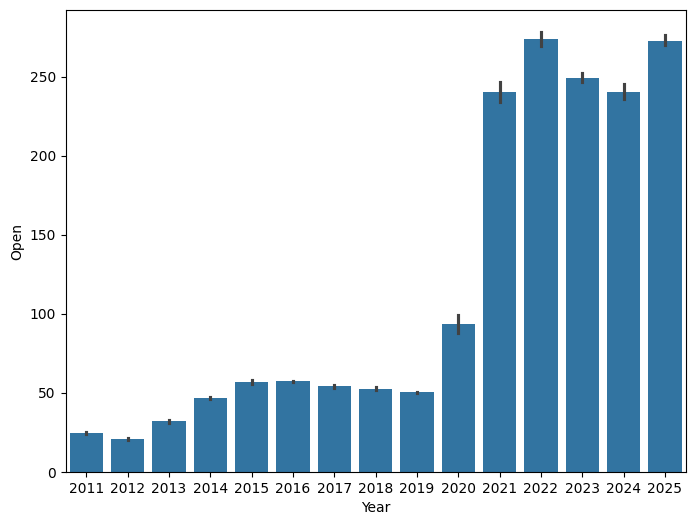

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='Year',y='Open',data=df)

<Axes: xlabel='Year', ylabel='Low'>

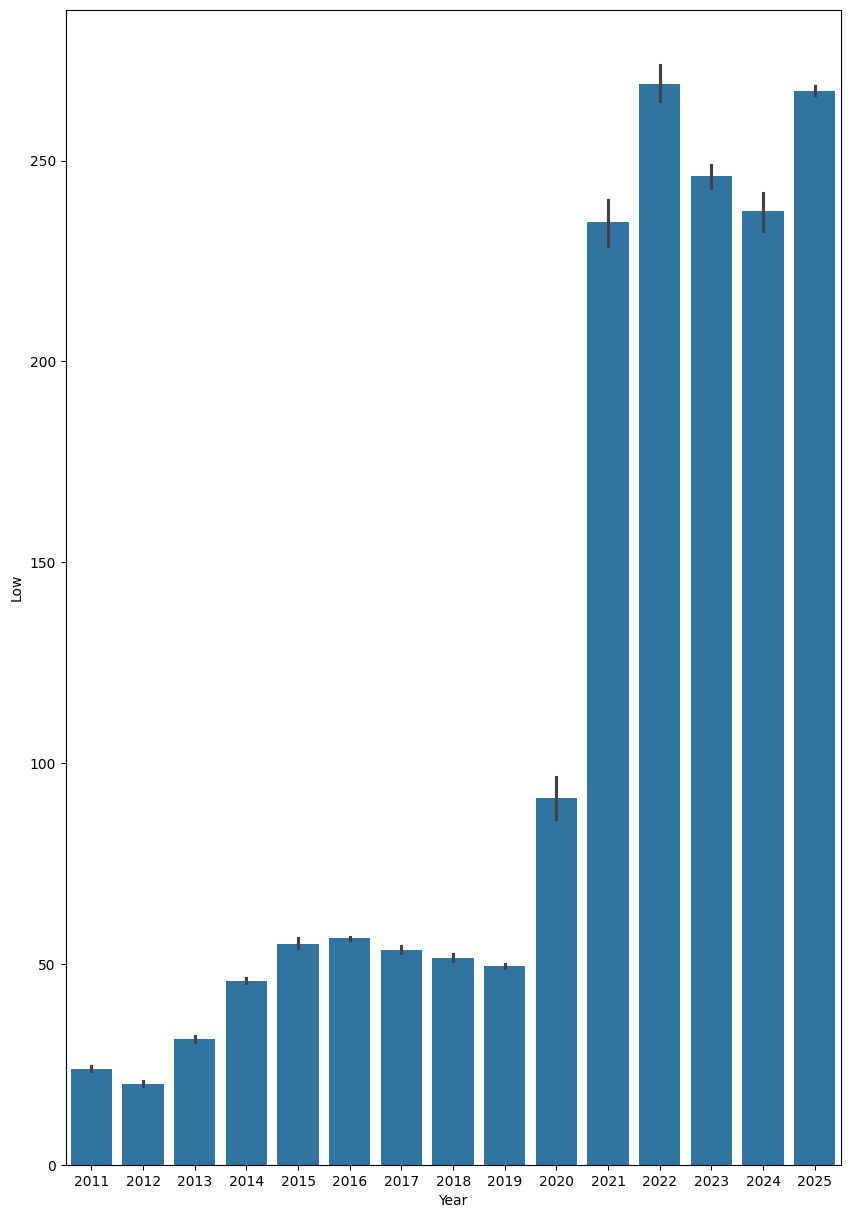

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(x='Year',y='Low',data=df)

<Axes: xlabel='Year', ylabel='High'>

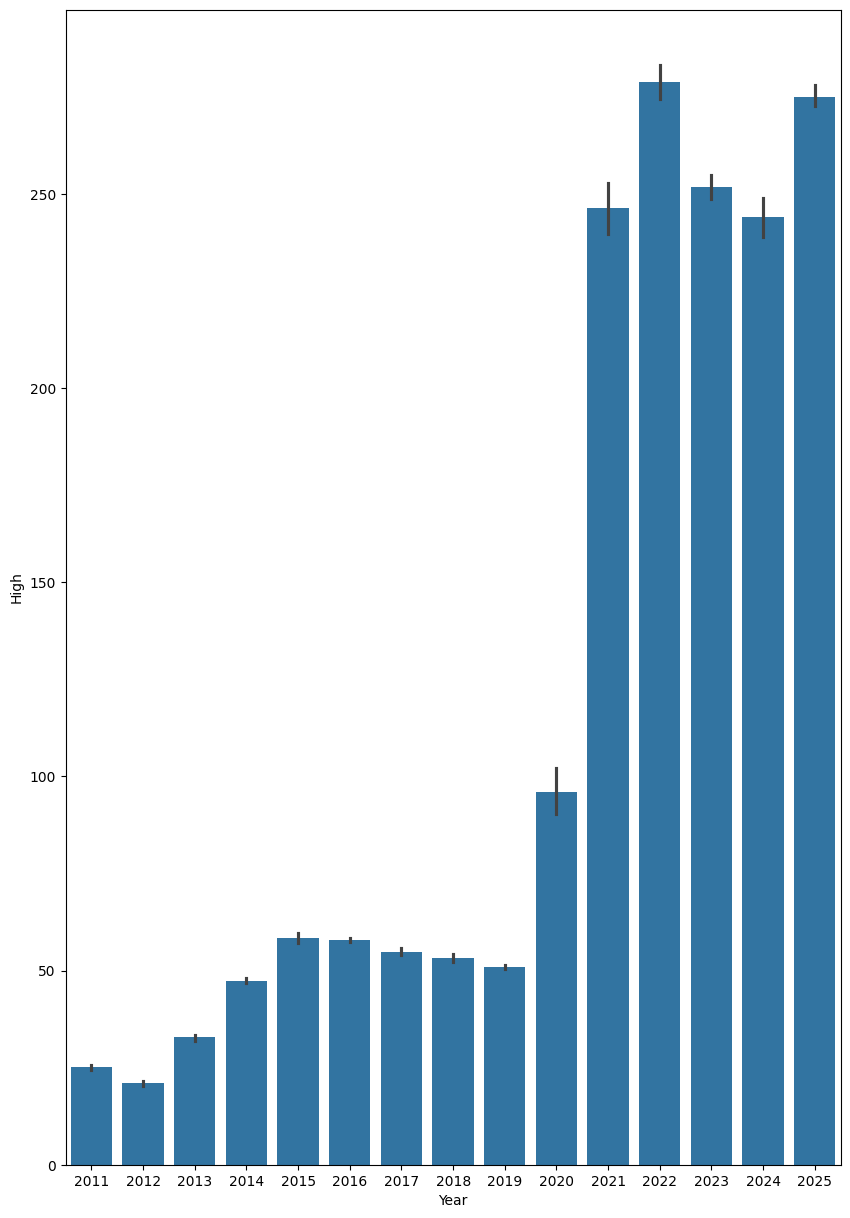

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(x='Year',y='High',data=df)

<Axes: xlabel='Adj Close', ylabel='Volume(Million)'>

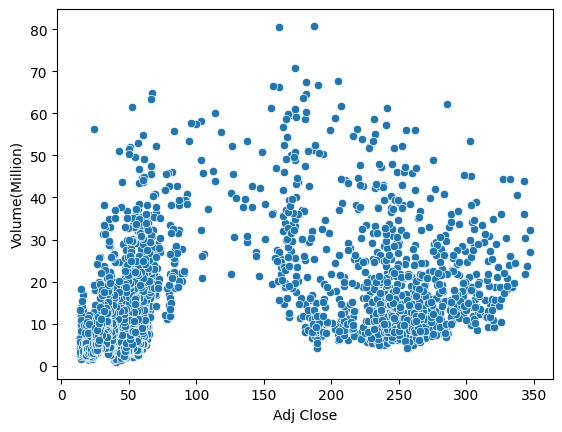

In [ ]:
sns.scatterplot(x='Adj Close',y='Volume(Million)',data=df)

<Axes: xlabel='Year', ylabel='Volume(Million)'>

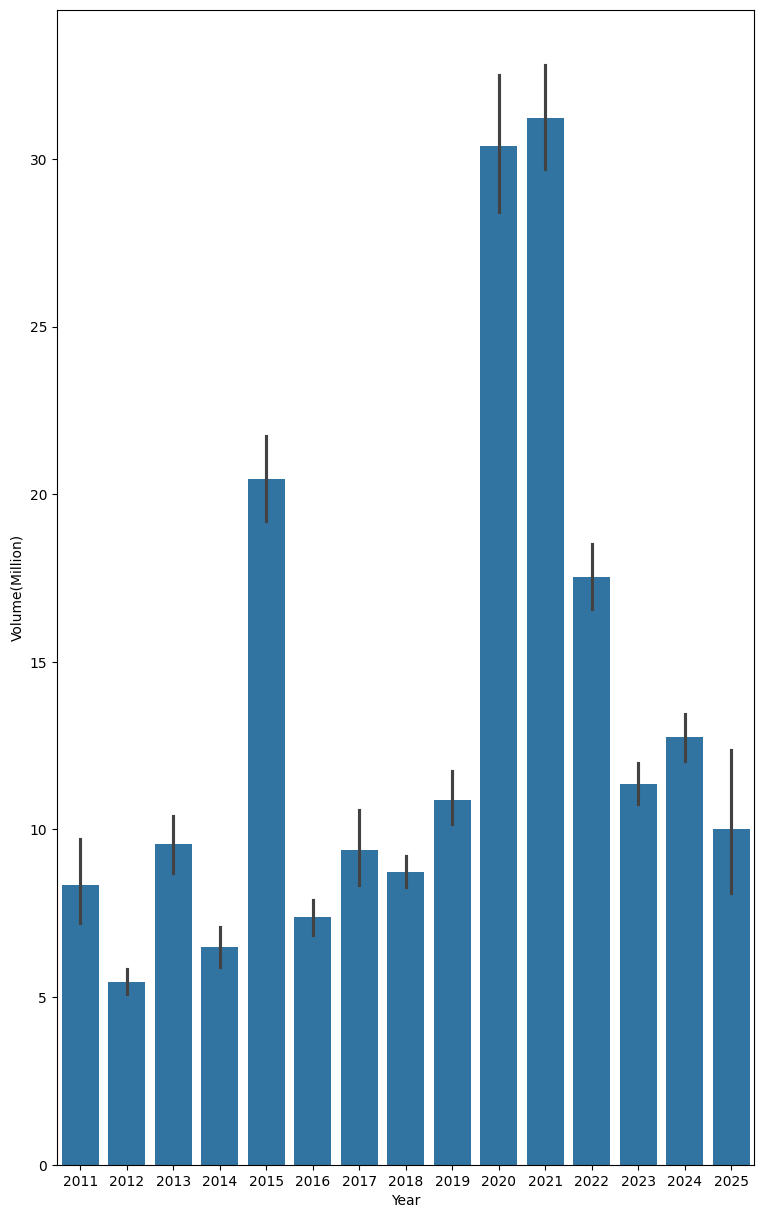

In [ ]:
plt.figure(figsize=(9,15))
sns.barplot(x='Year',y='Volume(Million)',data=df)

<Axes: xlabel='Year', ylabel='Adj Close'>

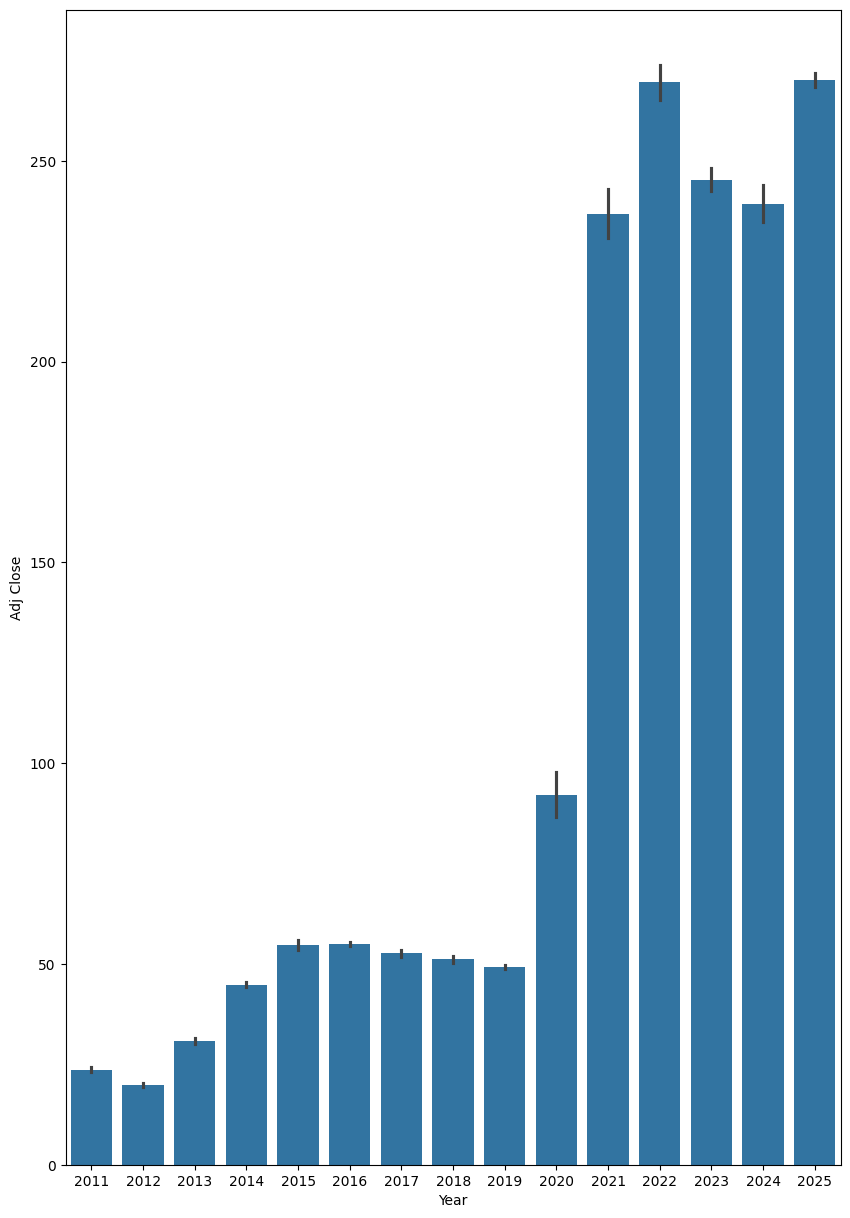

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(x='Year',y='Adj Close',data=df)

<Axes: xlabel='Month', ylabel='Open'>

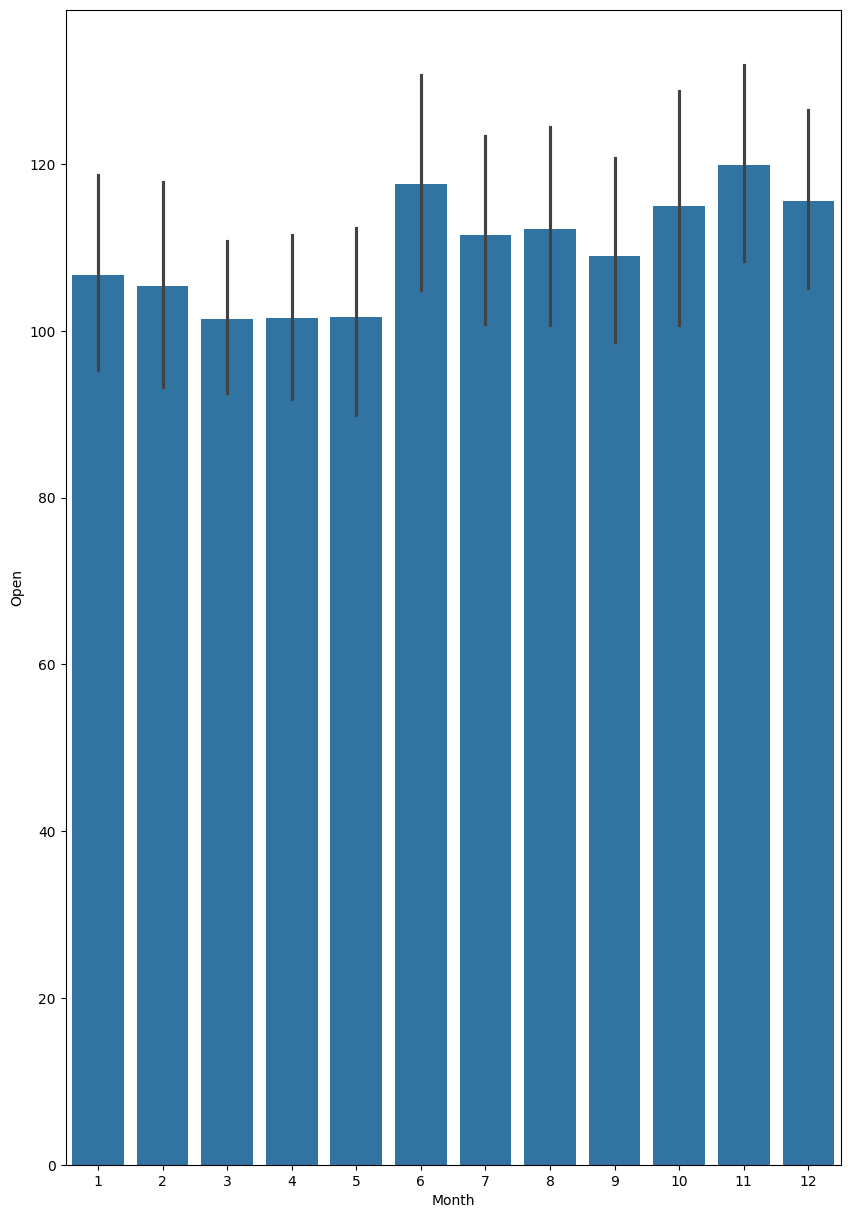

In [ ]:
plt.figure(figsize=(10,15))
sns.barplot(x='Month',y='Open',data=df)

In [ ]:
df['Adj Close-1']=df['Adj Close'].shift(1)
df['Adj Close-2']=df['Adj Close'].shift(2)
df['Adj Close-3']=df['Adj Close'].shift(3)
df['Adj Close-4']=df['Adj Close'].shift(4)
df['Adj Close+1']=df['Adj Close'].shift(-1)

In [ ]:
df['Volume(Million)-1']=df['Volume(Million)'].shift(1)
df['Volume(Million)-2']=df['Volume(Million)'].shift(2)
df['Volume(Million)-3']=df['Volume(Million)'].shift(3)
df['Volume(Million)-4']=df['Volume(Million)'].shift(4)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume(Million),Day,Month,Year,DayofWeek,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4,Adj Close+1,Volume(Million)-1,Volume(Million)-2,Volume(Million)-3,Volume(Million)-4
0,2025-01-10,269.00,270.39,264.78,266.02,266.02,8.05,10,1,2025,4,NaN,NaN,NaN,NaN,269.39,NaN,NaN,NaN,NaN
1,2025-01-09,269.00,271.70,266.66,269.39,269.39,6.56,9,1,2025,3,266.02,NaN,NaN,NaN,269.18,8.05,NaN,NaN,NaN
2,2025-01-08,272.99,273.99,265.81,269.18,269.18,10.91,8,1,2025,2,269.39,266.02,NaN,NaN,274.03,6.56,8.05,NaN,NaN
3,2025-01-07,271.28,277.73,267.50,274.03,274.03,9.57,7,1,2025,1,269.18,269.39,266.02,NaN,271.28,10.91,6.56,8.05,NaN
4,2025-01-06,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0,274.03,269.18,269.39,266.02,270.73,9.57,10.91,6.56,8.05


In [ ]:
df.drop(['Adj Close-1','Adj Close-2','Adj Close-3','Adj Close-4','Adj Close+1'],axis=1,inplace=True)

In [ ]:
df.drop(['Volume(Million)-1','Volume(Million)-2','Volume(Million)-3','Volume(Million)-4'],inplace=True,axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume(Million),Day,Month,Year,DayofWeek
0,269.00,270.39,264.78,266.02,266.02,8.05,10,1,2025,4
1,269.00,271.70,266.66,269.39,269.39,6.56,9,1,2025,3
2,272.99,273.99,265.81,269.18,269.18,10.91,8,1,2025,2
3,271.28,277.73,267.50,274.03,274.03,9.57,7,1,2025,1
4,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0


In [ ]:
df.to_csv('BYD_cleaned.csv')

In [ ]:
df_c=df.copy()
df_c.head()

,Date,Open,High,Low,Close,Adj Close,Volume(Million),Day,Month,Year,DayofWeek
0,2025-01-10,269.00,270.39,264.78,266.02,266.02,8.05,10,1,2025,4
1,2025-01-09,269.00,271.70,266.66,269.39,269.39,6.56,9,1,2025,3
2,2025-01-08,272.99,273.99,265.81,269.18,269.18,10.91,8,1,2025,2
3,2025-01-07,271.28,277.73,267.50,274.03,274.03,9.57,7,1,2025,1
4,2025-01-06,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0


In [ ]:
df_c['Adj Close-1']=df_c['Adj Close'].shift(1)
df_c['Adj Close-2']=df_c['Adj Close'].shift(2)
df_c['Adj Close-3']=df_c['Adj Close'].shift(3)
df_c['Adj Close-4']=df_c['Adj Close'].shift(4)
df_c['Adj Close+1']=df_c['Adj Close'].shift(-1)

In [ ]:
df_c.head()

,Date,Open,High,Low,Close,Adj Close,Volume(Million),Day,Month,Year,DayofWeek,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4,Adj Close+1
0,2025-01-10,269.00,270.39,264.78,266.02,266.02,8.05,10,1,2025,4,NaN,NaN,NaN,NaN,269.39
1,2025-01-09,269.00,271.70,266.66,269.39,269.39,6.56,9,1,2025,3,266.02,NaN,NaN,NaN,269.18
2,2025-01-08,272.99,273.99,265.81,269.18,269.18,10.91,8,1,2025,2,269.39,266.02,NaN,NaN,274.03
3,2025-01-07,271.28,277.73,267.50,274.03,274.03,9.57,7,1,2025,1,269.18,269.39,266.02,NaN,271.28
4,2025-01-06,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0,274.03,269.18,269.39,266.02,270.73


In [ ]:
df_c['Volume(Million)-1']=df_c['Volume(Million)'].shift(1)
df_c['Volume(Million)-2']=df_c['Volume(Million)'].shift(2)
df_c['Volume(Million)-3']=df_c['Volume(Million)'].shift(3)
df_c['Volume(Million)-4']=df_c['Volume(Million)'].shift(4)

In [ ]:
df_c.head()

,Date,Open,High,Low,Close,Adj Close,Volume(Million),Day,Month,Year,DayofWeek,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4,Adj Close+1,Volume(Million)-1,Volume(Million)-2,Volume(Million)-3,Volume(Million)-4
0,2025-01-10,269.00,270.39,264.78,266.02,266.02,8.05,10,1,2025,4,NaN,NaN,NaN,NaN,269.39,NaN,NaN,NaN,NaN
1,2025-01-09,269.00,271.70,266.66,269.39,269.39,6.56,9,1,2025,3,266.02,NaN,NaN,NaN,269.18,8.05,NaN,NaN,NaN
2,2025-01-08,272.99,273.99,265.81,269.18,269.18,10.91,8,1,2025,2,269.39,266.02,NaN,NaN,274.03,6.56,8.05,NaN,NaN
3,2025-01-07,271.28,277.73,267.50,274.03,274.03,9.57,7,1,2025,1,269.18,269.39,266.02,NaN,271.28,10.91,6.56,8.05,NaN
4,2025-01-06,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0,274.03,269.18,269.39,266.02,270.73,9.57,10.91,6.56,8.05


In [ ]:
df_c.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume(Million),0
Day,0
Month,0
Year,0


In [ ]:
df_c.dropna(inplace=True)

In [ ]:
df_c.head()

,Date,Open,High,Low,Close,Adj Close,Volume(Million),Day,Month,Year,DayofWeek,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4,Adj Close+1,Volume(Million)-1,Volume(Million)-2,Volume(Million)-3,Volume(Million)-4
4,2025-01-06,271.94,273.89,269.03,271.28,271.28,8.24,6,1,2025,0,274.03,269.18,269.39,266.02,270.73,9.57,10.91,6.56,8.05
5,2025-01-03,271.50,274.59,268.24,270.73,270.73,9.94,3,1,2025,4,271.28,274.03,269.18,269.39,271.10,8.24,9.57,10.91,6.56
6,2025-01-02,283.00,283.08,269.42,271.10,271.10,16.88,2,1,2025,3,270.73,271.28,274.03,269.18,282.66,9.94,8.24,9.57,10.91
7,2024-12-31,285.00,286.50,282.00,282.66,282.66,7.76,31,12,2024,1,271.10,270.73,271.28,274.03,284.99,16.88,9.94,8.24,9.57
8,2024-12-30,287.20,289.50,283.33,284.99,284.99,8.29,30,12,2024,0,282.66,271.10,270.73,271.28,286.28,7.76,16.88,9.94,8.24


In [ ]:
df_c.drop(['Open','High','Low','Close','Year'],inplace=True,axis=1)

In [ ]:
df_c.head()

,Date,Adj Close,Volume(Million),Day,Month,DayofWeek,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4,Adj Close+1,Volume(Million)-1,Volume(Million)-2,Volume(Million)-3,Volume(Million)-4
4,2025-01-06,271.28,8.24,6,1,0,274.03,269.18,269.39,266.02,270.73,9.57,10.91,6.56,8.05
5,2025-01-03,270.73,9.94,3,1,4,271.28,274.03,269.18,269.39,271.10,8.24,9.57,10.91,6.56
6,2025-01-02,271.10,16.88,2,1,3,270.73,271.28,274.03,269.18,282.66,9.94,8.24,9.57,10.91
7,2024-12-31,282.66,7.76,31,12,1,271.10,270.73,271.28,274.03,284.99,16.88,9.94,8.24,9.57
8,2024-12-30,284.99,8.29,30,12,0,282.66,271.10,270.73,271.28,286.28,7.76,16.88,9.94,8.24


<Axes: xlabel='Month', ylabel='Adj Close'>

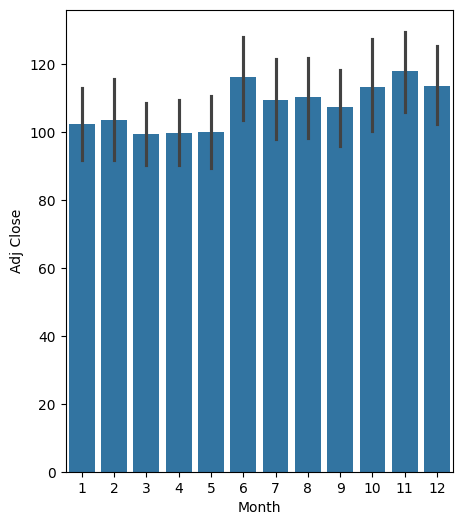

In [ ]:
plt.figure(figsize=(5,6))
sns.barplot(x='Month',y='Adj Close',data=df_c)

<Axes: xlabel='Day', ylabel='Adj Close'>

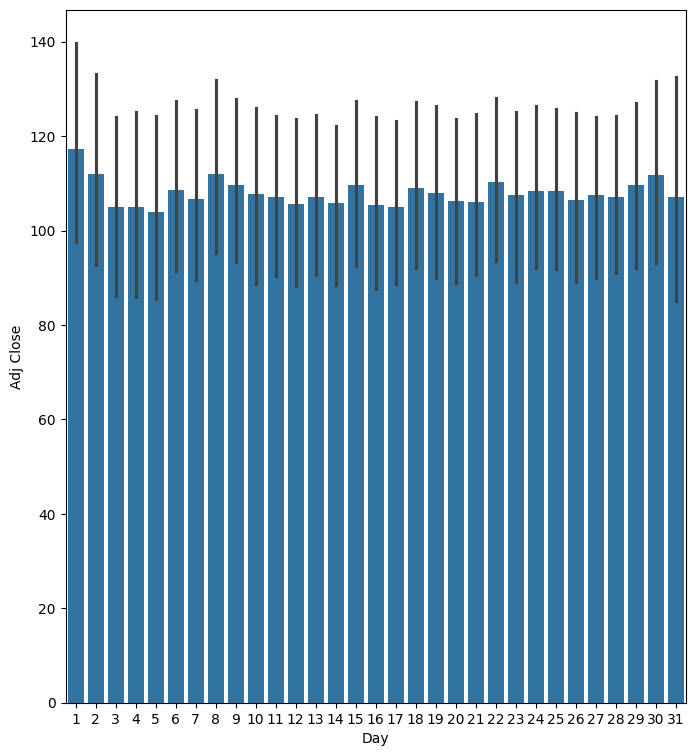

In [ ]:
plt.figure(figsize=(8,9))
sns.barplot(x='Day',y='Adj Close',data=df_c)

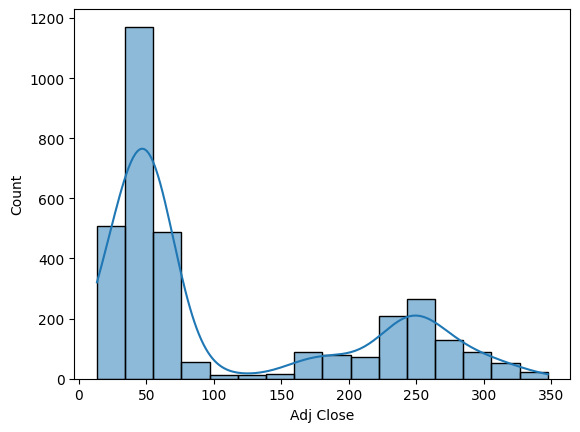

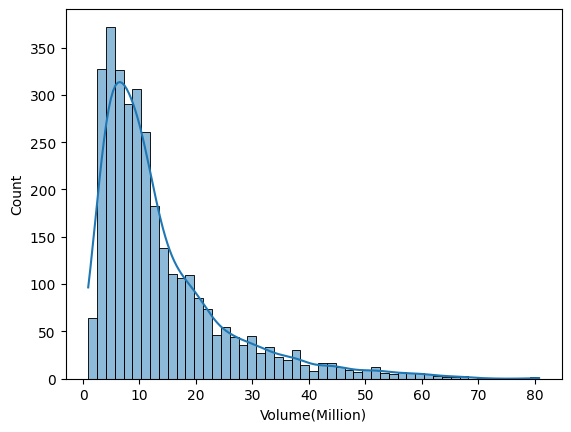

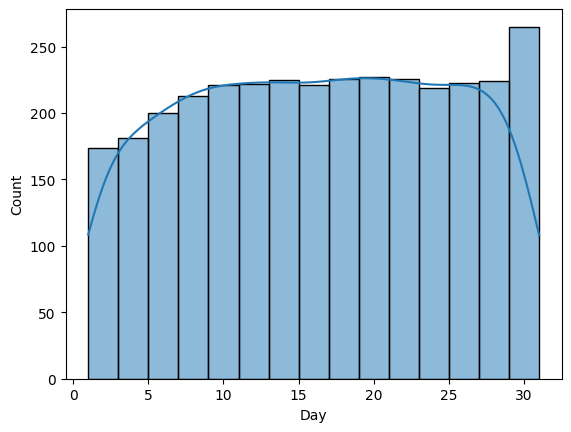

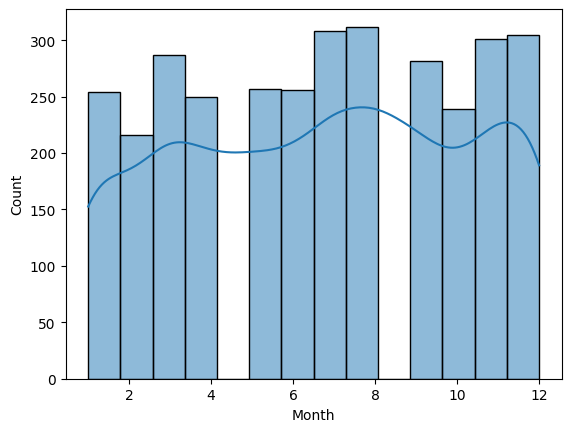

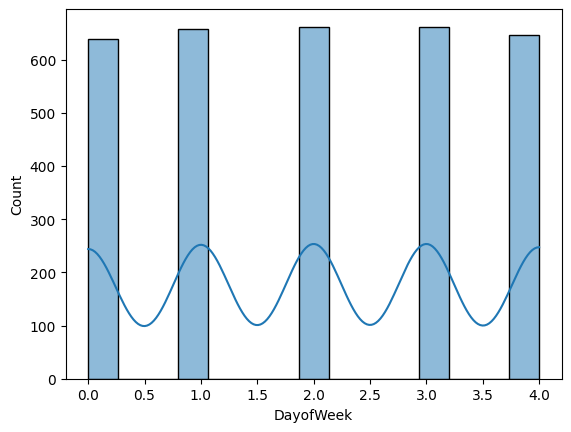

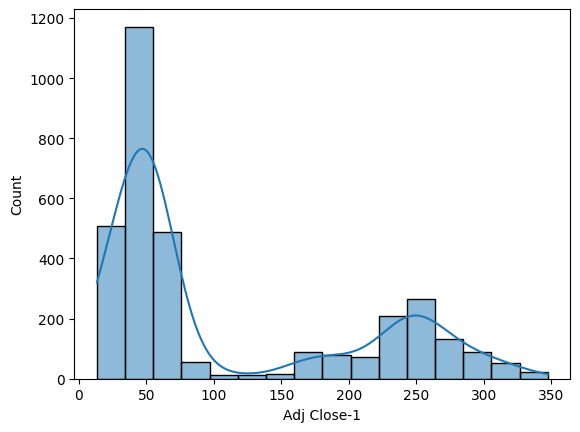

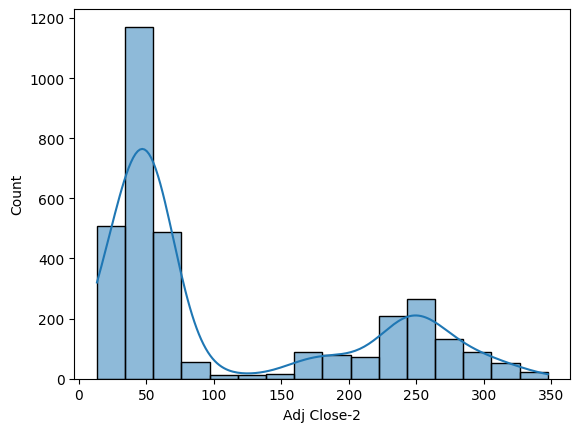

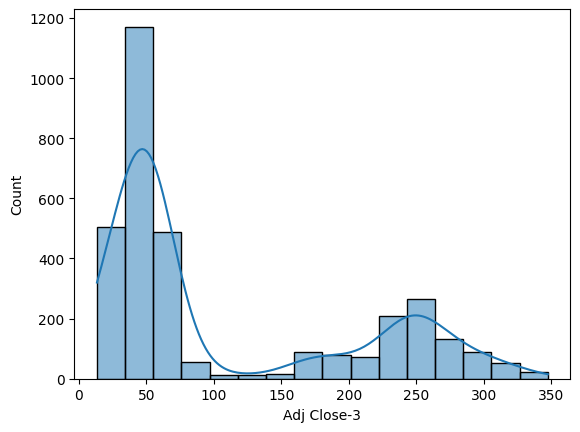

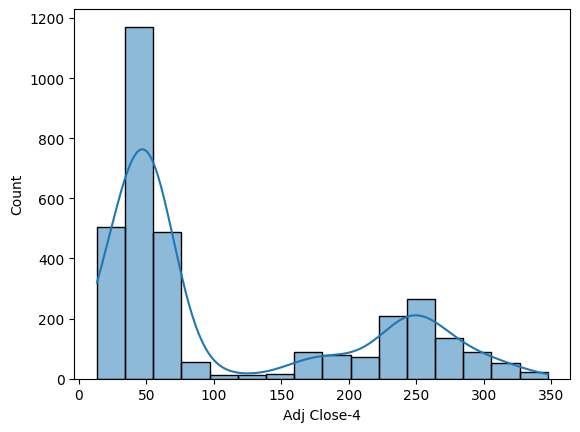

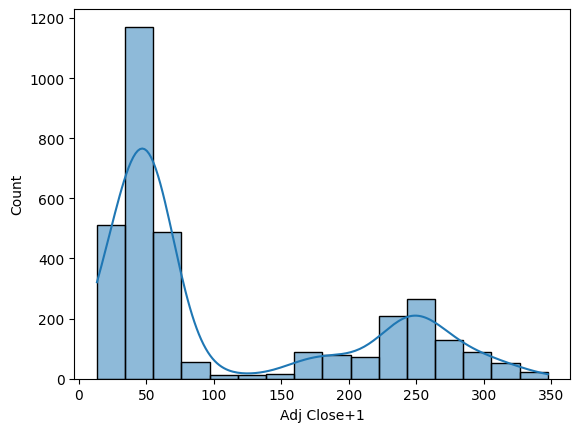

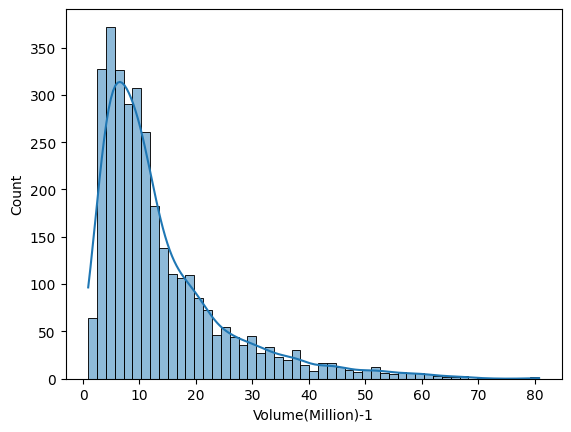

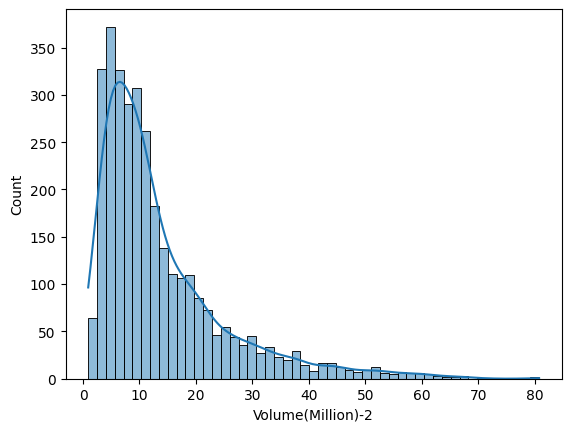

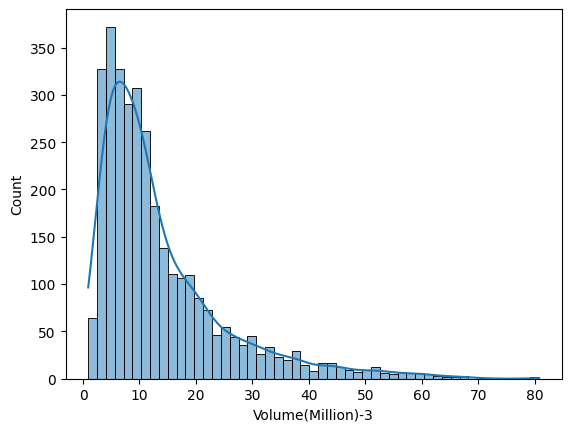

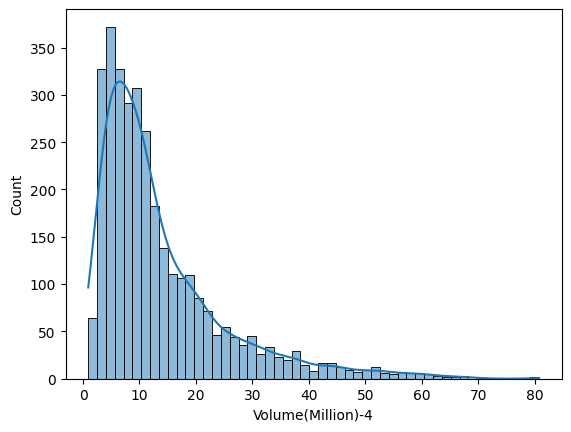

In [ ]:
for i in df_c.columns:
  sns.histplot(data=df_c,x=i,kde=True)
  plt.show()

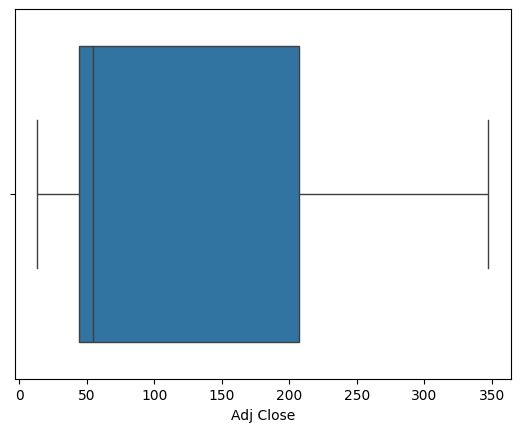

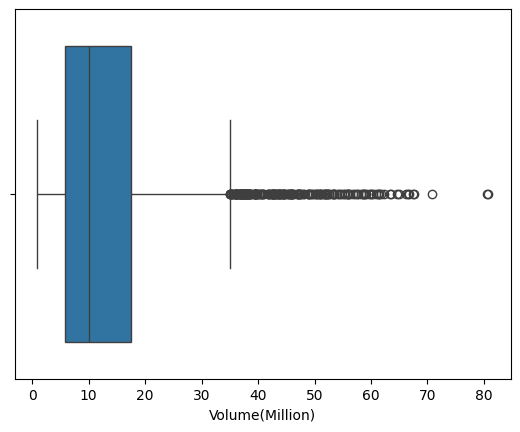

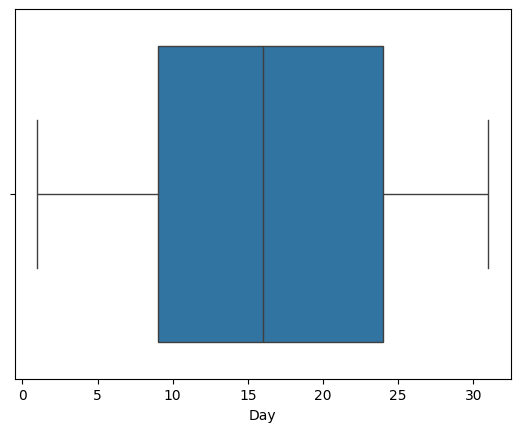

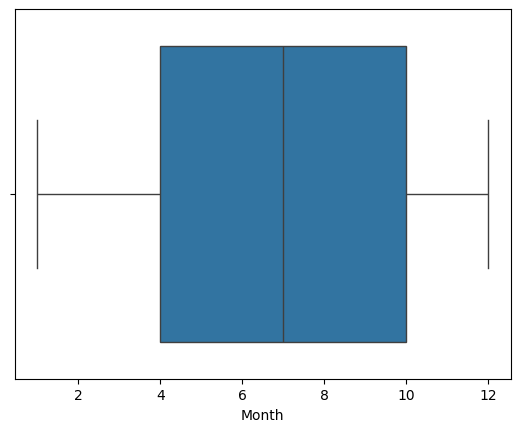

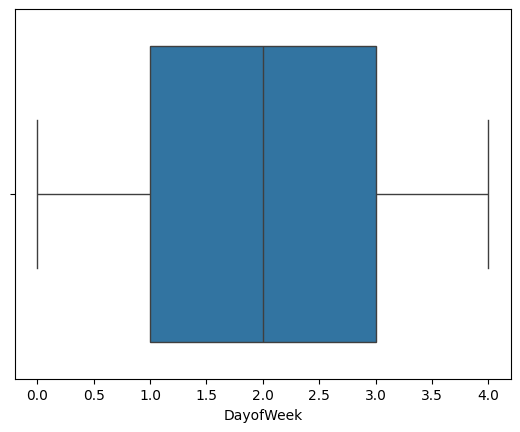

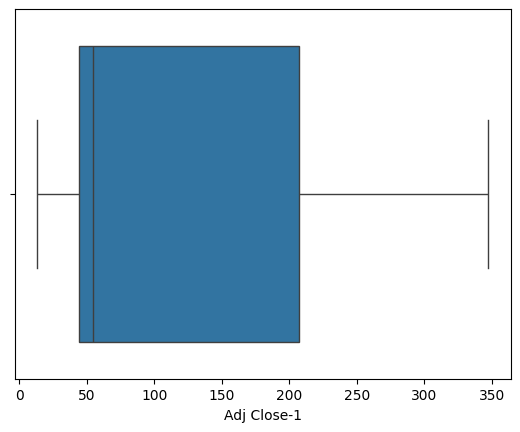

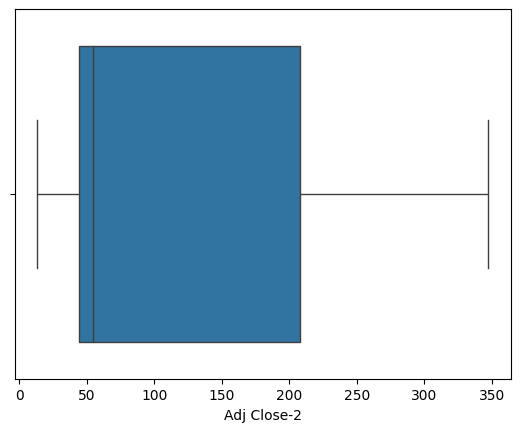

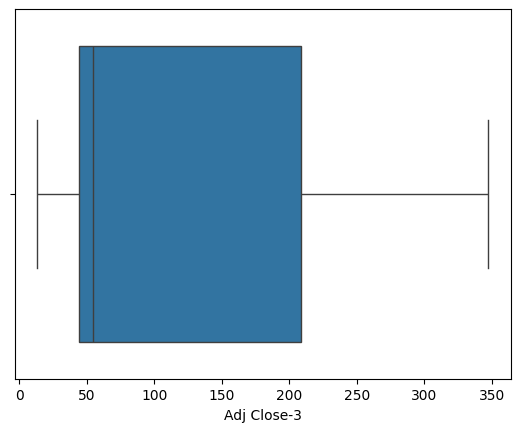

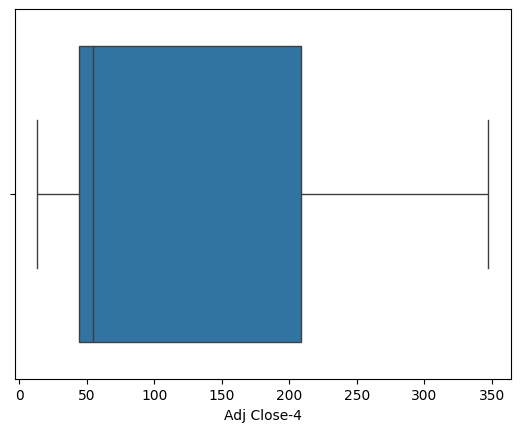

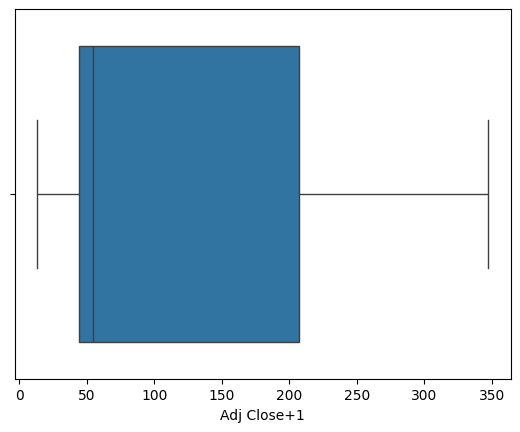

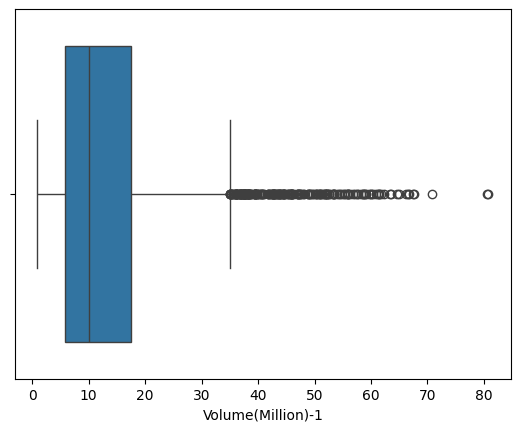

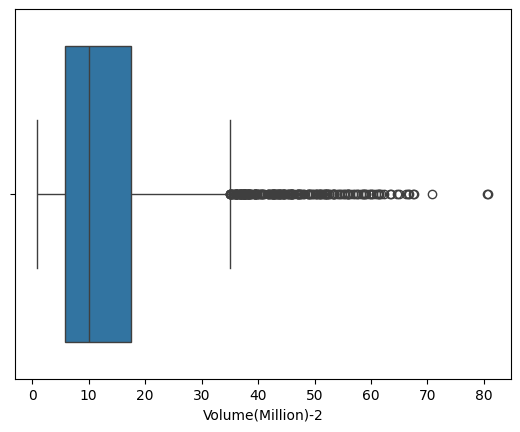

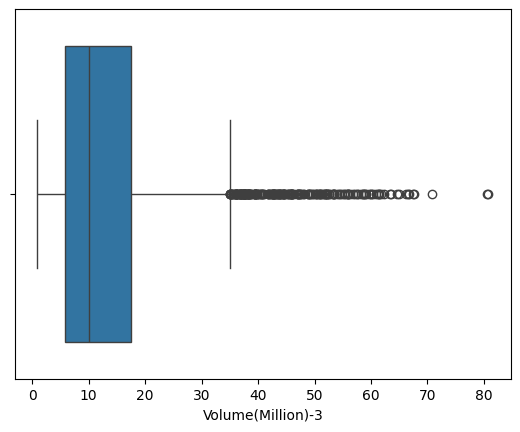

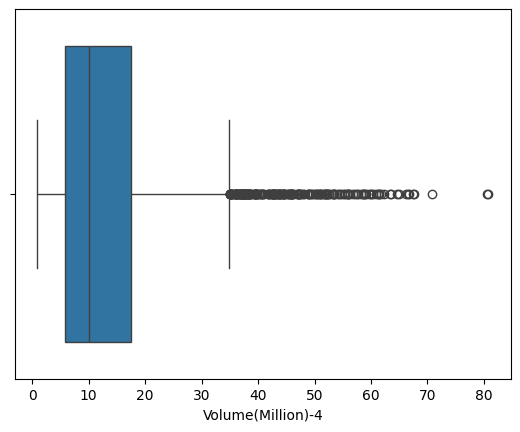

In [ ]:
for i in df_c.columns:
  sns.boxplot(data=df_c,x=i)
  plt.show()

In [ ]:
df_c.corr()

,Adj Close,Volume(Million),Day,Month,DayofWeek,Adj Close-1,Adj Close-2,Adj Close-3,Adj Close-4,Adj Close+1,Volume(Million)-1,Volume(Million)-2,Volume(Million)-3,Volume(Million)-4
Adj Close,1.000000,0.346402,-0.001713,0.052598,0.001918,0.999198,0.998432,0.997608,0.996912,0.999197,0.340026,0.336354,0.332656,0.329768
Volume(Million),0.346402,1.000000,-0.031296,-0.024957,-0.023645,0.347951,0.349681,0.351013,0.352171,0.340115,0.843280,0.788109,0.760971,0.746777
Day,-0.001713,-0.031296,1.000000,0.023959,-0.004306,-0.001450,-0.001046,-0.000685,0.000581,-0.000512,-0.018220,-0.011141,-0.018438,-0.013349
Month,0.052598,-0.024957,0.023959,1.000000,-0.005941,0.052286,0.051929,0.051563,0.051202,0.052706,-0.024297,-0.024297,-0.025743,-0.028755
DayofWeek,0.001918,-0.023645,-0.004306,-0.005941,1.000000,0.002446,0.002879,0.003226,0.002752,0.003638,-0.000375,0.003925,0.019275,-0.004869
Adj Close-1,0.999198,0.347951,-0.001450,0.052286,0.002446,1.000000,0.999198,0.998433,0.997609,0.998431,0.346286,0.340538,0.336388,0.332489
Adj Close-2,0.998432,0.349681,-0.001046,0.051929,0.002879,0.999198,1.000000,0.999199,0.998434,0.997606,0.347843,0.346798,0.340578,0.336229
Adj Close-3,0.997608,0.351013,-0.000685,0.051563,0.003226,0.998433,0.999199,1.000000,0.999199,0.996909,0.349572,0.348353,0.346836,0.340418
Adj Close-4,0.996912,0.352171,0.000581,0.051202,0.002752,0.997609,0.998434,0.999199,1.000000,0.996196,0.350913,0.350090,0.348403,0.346685
Adj Close+1,0.999197,0.340115,-0.000512,0.052706,0.003638,0.998431,0.997606,0.996909,0.996196,1.000000,0.335797,0.332582,0.329908,0.326533


<Axes: >

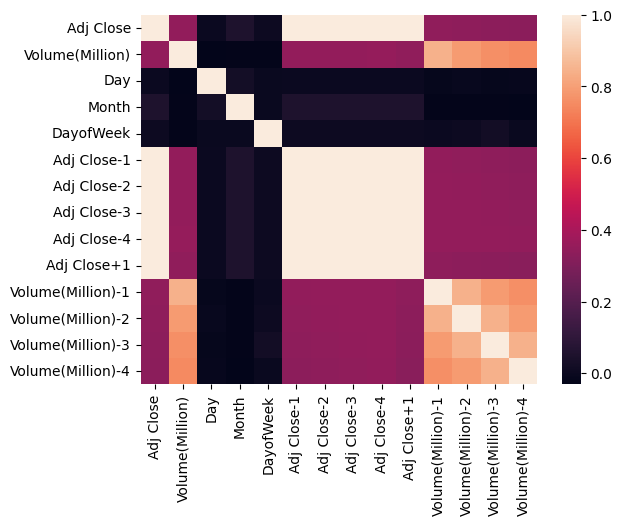

In [ ]:
sns.heatmap(df_c.corr())

In [ ]:
X=df_c.drop('Adj Close+1',axis=1)
y=df_c['Adj Close+1']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

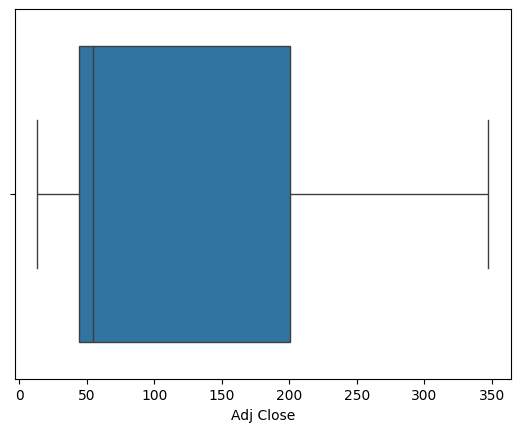

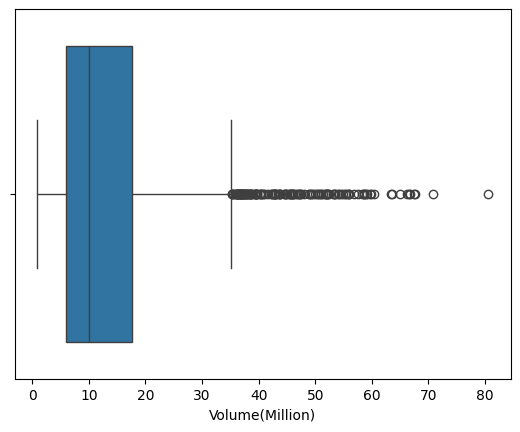

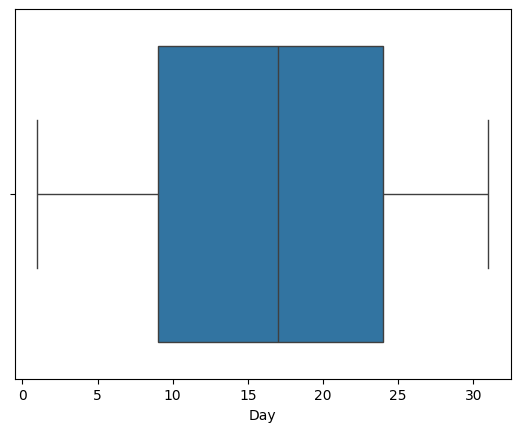

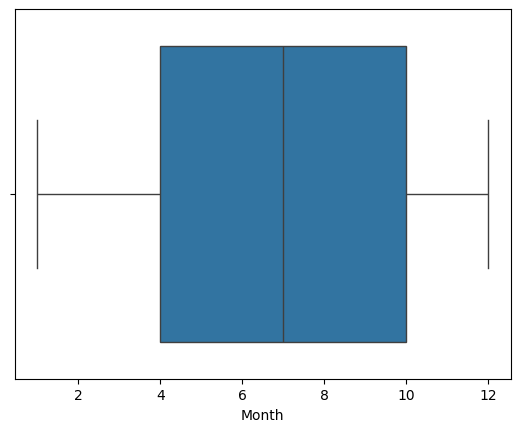

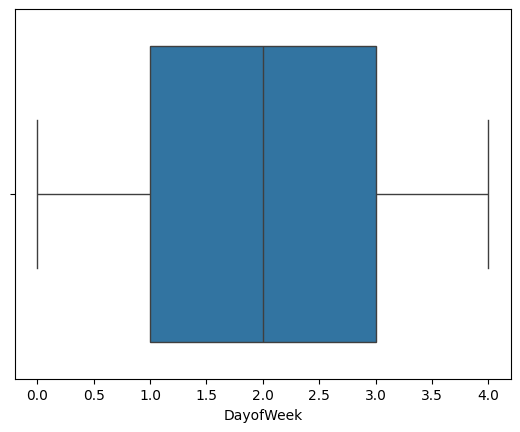

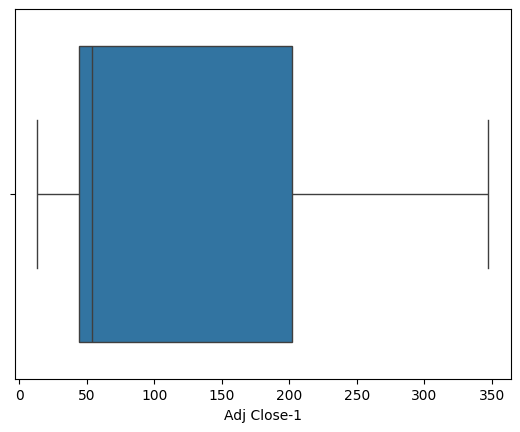

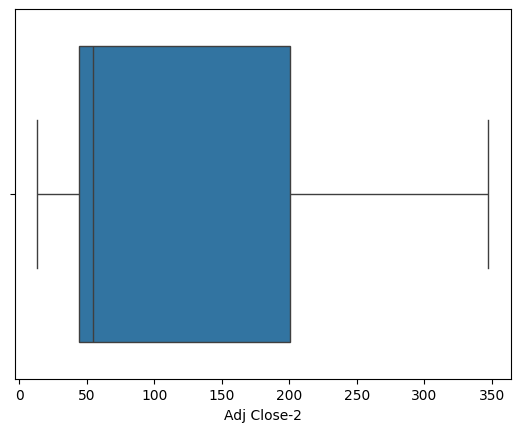

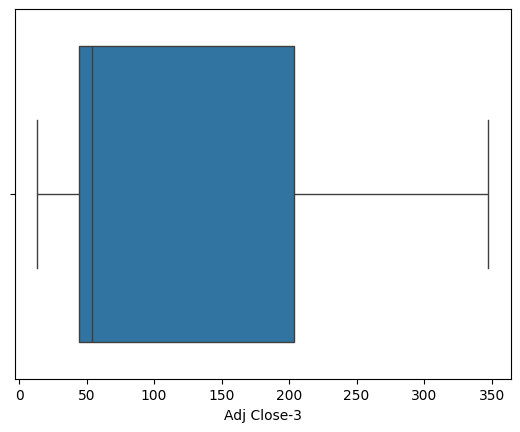

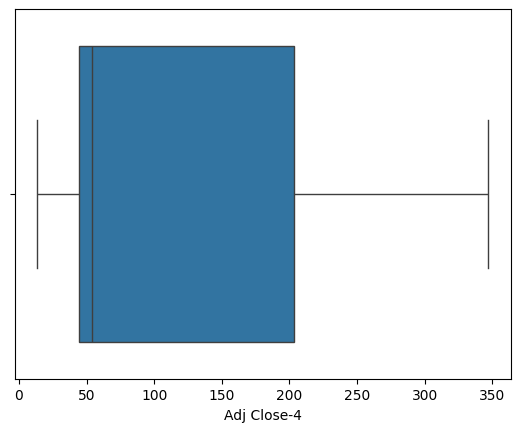

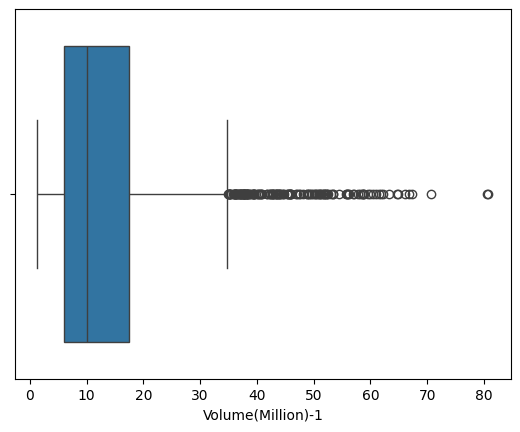

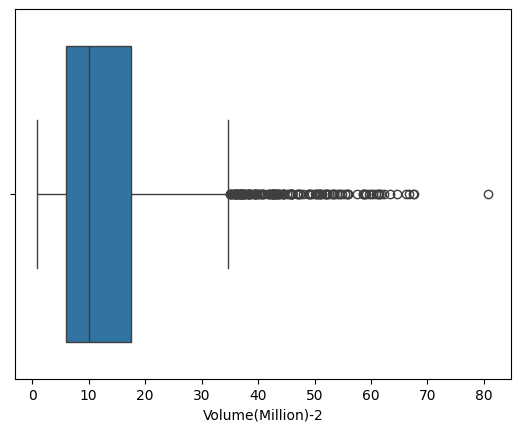

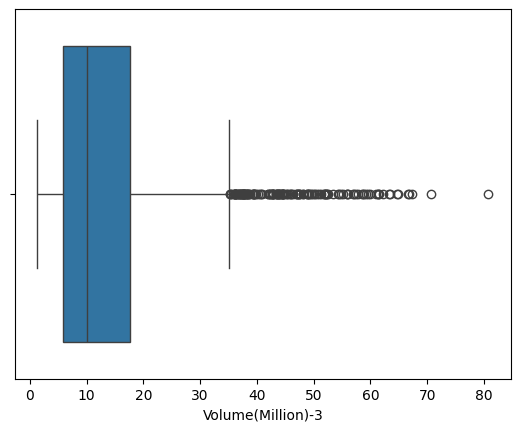

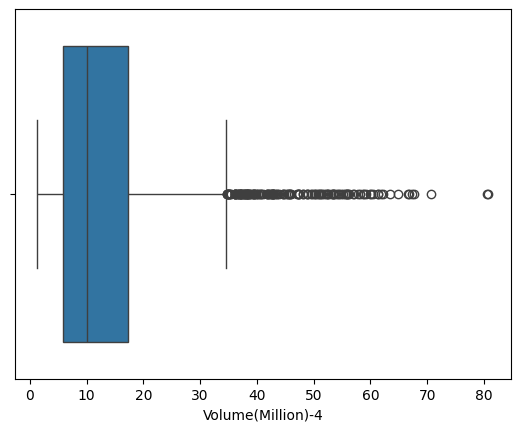

In [ ]:
for i in X_train.columns:
  sns.boxplot(data=X_train,x=i)
  plt.show()

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
ypred=linreg.predict(X_test_scaled)
print(r2_score(y_test,ypred))
print(mean_squared_error(y_test,ypred))
print(mean_absolute_error(y_test,ypred))

0.9984516738309231
14.577598165393615
2.124516014926728


<ipython-input-246-5ddab0fae7f2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Adj Close+1', ylabel='Density'>

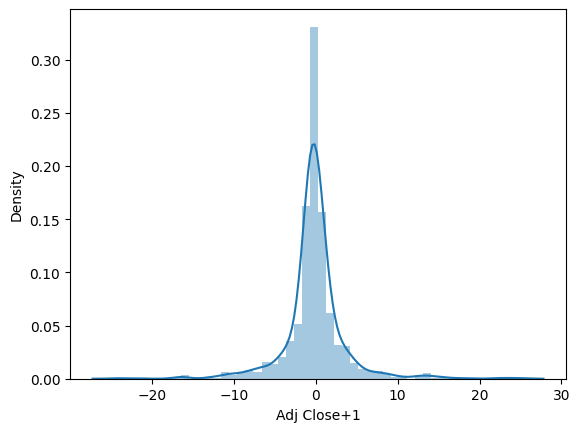

In [ ]:
residuals=y_test-ypred
sns.distplot(residuals,kde=True)